# Newborn Health
## Challenge
There are approximately 2,000 characters in A Song of Ice and Fire by George R.R. Martin. This book series was the inspiration for the HBO series Game of Thrones. Your tasks as a future master of analytics are to predict which characters in the series will live or die, and give data-driven recommendations on how to survive in Game of Thrones. This assignment will encompass feature engineering, variable selection, and model development. .

## Deliverables

### No 1
Analysis Write Up
- Summarize the problem
- Present key insights that are actionable
- Offer implementation recommendations
- Maximum of 2 pages double-spaced (A.P.A format)

### No 2
Data Analysis and Analysis Code
- Tell the story of your analysis through:
 - exploratory data analysis
 - feature treatment and engineering
 - utilizing appropriate modeling techniques
- Code should:
 - be well commented
 - follow PEP 8 guidelines (see myCourses for more details)
 - run without errors
 - be submitted as a .py script
 
### No 3
Final Model and Model Code
- Model will be assessed on:
 - AUC value on unseen data (randomly seeded)
 - appropriateness for the problem at hand
- Code should:
 - be well commented
 - follow PEP 8 guidelines (see myCourses for more details)
 - run without errors
 - be submitted as a .py script
 
## Carolina Rios


## Data
Data File: GOT_character_predictions.xlsx

Data Dictionary: GOT_data_dictionary.xlsx

### Data Dictionarty

| variable | label       | description |
|---|---|---|
| 1        | S.No        | Character number (by order of appearance)               |

| 2        | name        | mother's educ                   |
| 3        | title       | month prenatal care began       |
| 4        | male        | total number of prenatal visits |
| 5        | culture     | father's age, years             |
| 6        | dateOfBirth                | father's educ, years            |
| 7        | mother                     | one minute apgar score          |
| 8        | father                     | five minute apgar score         |
| 9        | heir                       | avg cigarettes per day          |
| 10       | house                      | avg drinks per week             |
| 11       | spouse                     | 1 if baby male                  |
| 12       | book1_A_Game_Of_Thrones    | 1 if mother white               |
| 13       | mblbook2_A_Clash_Of_Kings  | 1 if mother black               |
| 14       | book3_A_Storm_Of_Swords    | 1 if mother is other            |
| 15       | book4_A_Feast_For_Crows    | 1 if father white               |
| 16       | book5_A_Dance_with_dragons | 1 if father black               |
| 17       | foth    | 1 if father is other            |
| 18       | bwght   | birthweight, grams              |

# Imports

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import graphviz
import matplotlib.pylab as pl
# prep
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# linear models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import lasso_path
from sklearn.linear_model import enet_path
import statsmodels.formula.api as smf
# other models
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
# metrics
from sklearn import metrics
from sklearn.metrics import r2_score
import shap

%matplotlib inline

# Load and prepare data

## Load

In [94]:
file = "GOT_character_predictions.xlsx"
GOT = pd.read_excel(file)

## Explore data

In [95]:
GOT.head()

S.No           name title  male              culture  dateOfBirth mother  \
0  1739   Imry Florent   Ser     1                  NaN          NaN    NaN   
1  1233  Merianne Frey   NaN     0                  NaN        288.0    NaN   
2   998           Dolf   NaN     0  Vale mountain clans          NaN    NaN   
3    64          Quill   NaN     1             Braavosi          NaN    NaN   
4   334          Bandy   NaN     0             Northmen          NaN    NaN   

  father heir          house  ... isAliveMother  isAliveFather  isAliveHeir  \
0    NaN  NaN  House Florent  ...           NaN            NaN          NaN   
1    NaN  NaN     House Frey  ...           NaN            NaN          NaN   
2    NaN  NaN    Stone Crows  ...           NaN            NaN          NaN   
3    NaN  NaN            NaN  ...           NaN            NaN          NaN   
4    NaN  NaN    House Stark  ...           NaN            NaN          NaN   

   isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  \
0            NaN          0        1   NaN                 0    0.183946   
1            NaN          0        0  17.0                 0    0.083612   
2            NaN          0        0   NaN                 0    0.016722   
3            NaN          0        0   NaN                 0    0.016722   
4            NaN          0        0   NaN                 0    0.020067   

   isAlive  
0        0  
1        1  
2        1  
3        1  
4        1  

[5 rows x 26 columns]

In [96]:
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
S.No                          1946 non-null int64
name                          1946 non-null object
title                         938 non-null object
male                          1946 non-null int64
culture                       677 non-null object
dateOfBirth                   433 non-null float64
mother                        21 non-null object
father                        26 non-null object
heir                          23 non-null object
house                         1519 non-null object
spouse                        276 non-null object
book1_A_Game_Of_Thrones       1946 non-null int64
book2_A_Clash_Of_Kings        1946 non-null int64
book3_A_Storm_Of_Swords       1946 non-null int64
book4_A_Feast_For_Crows       1946 non-null int64
book5_A_Dance_with_Dragons    1946 non-null int64
isAliveMother                 21 non-null float64
isAliveFather                 26 non-null f

In [97]:
x = GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
S.No                          1946 non-null int64
name                          1946 non-null object
title                         938 non-null object
male                          1946 non-null int64
culture                       677 non-null object
dateOfBirth                   433 non-null float64
mother                        21 non-null object
father                        26 non-null object
heir                          23 non-null object
house                         1519 non-null object
spouse                        276 non-null object
book1_A_Game_Of_Thrones       1946 non-null int64
book2_A_Clash_Of_Kings        1946 non-null int64
book3_A_Storm_Of_Swords       1946 non-null int64
book4_A_Feast_For_Crows       1946 non-null int64
book5_A_Dance_with_Dragons    1946 non-null int64
isAliveMother                 21 non-null float64
isAliveFather                 26 non-null f

In [98]:
print(x)

None


In [99]:
GOT.describe().round(2)

S.No     male  dateOfBirth  book1_A_Game_Of_Thrones  \
count  1946.00  1946.00       433.00                   1946.0   
mean    973.50     0.62      1577.36                      0.2   
std     561.91     0.49     19565.41                      0.4   
min       1.00     0.00       -28.00                      0.0   
25%     487.25     0.00       240.00                      0.0   
50%     973.50     1.00       268.00                      0.0   
75%    1459.75     1.00       285.00                      0.0   
max    1946.00     1.00    298299.00                      1.0   

       book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  \
count                 1946.00                  1946.00   
mean                     0.37                     0.48   
std                      0.48                     0.50   
min                      0.00                     0.00   
25%                      0.00                     0.00   
50%                      0.00                     0.00   
75%                      1.00                     1.00   
max                      1.00                     1.00   

       book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  \
count                  1946.00                     1946.00          21.00   
mean                      0.59                        0.40           0.71   
std                       0.49                        0.49           0.46   
min                       0.00                        0.00           0.00   
25%                       0.00                        0.00           0.00   
50%                       1.00                        0.00           1.00   
75%                       1.00                        1.00           1.00   
max                       1.00                        1.00           1.00   

       isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble  \
count          26.00        23.00         276.00    1946.00  1946.00   
mean            0.19         0.65           0.78       0.14     0.46   
std             0.40         0.49           0.42       0.35     0.50   
min             0.00         0.00           0.00       0.00     0.00   
25%             0.00         0.00           1.00       0.00     0.00   
50%             0.00         1.00           1.00       0.00     0.00   
75%             0.00         1.00           1.00       0.00     1.00   
max             1.00         1.00           1.00       1.00     1.00   

             age  numDeadRelations  popularity  isAlive  
count     433.00           1946.00     1946.00  1946.00  
mean    -1293.56              0.31        0.09     0.75  
std     19564.34              1.38        0.16     0.44  
min   -298001.00              0.00        0.00     0.00  
25%        18.00              0.00        0.01     0.00  
50%        27.00              0.00        0.03     1.00  
75%        50.00              0.00        0.09     1.00  
max       100.00             15.00        1.00     1.00

## Clean data

First create new columns for na flags than explore the colums having nas one at a time and treat them.

In [100]:
GOT['title'].value_counts()

Ser                                       384
Maester                                    39
Archmaester                                21
Lord                                       20
Septon                                     18
Winterfell                                 17
Princess                                   16
Lady                                       12
Septa                                      10
Lord Commander of the Night's Watch         9
King in the North                           9
Prince                                      9
Cupbearer                                   8
Grand Maester                               8
Khal                                        7
Bloodrider                                  6
King-Beyond-the-Wall                        5
Prince of Dragonstone                       5
Wisdom                                      5
Eyrie                                       5
Casterly Rock                               5
Knight                            

In [101]:
GOT['title']= GOT['title'].fillna('na')
GOT['title'].value_counts()

na                                        1008
Ser                                        384
Maester                                     39
Archmaester                                 21
Lord                                        20
Septon                                      18
Winterfell                                  17
Princess                                    16
Lady                                        12
Septa                                       10
King in the North                            9
Prince                                       9
Lord Commander of the Night's Watch          9
Grand Maester                                8
Cupbearer                                    8
Khal                                         7
Bloodrider                                   6
Casterly Rock                                5
King-Beyond-the-Wall                         5
Wisdom                                       5
Eyrie                                        5
Prince of Dra

In [102]:
GOT['title'] = GOT['title'].apply(lambda x : x if x in ['Ser', 'na', 'Maester', 'Archmaester', 'Lord', 'Septon', 'Winterfell', 'Princess', 'Lady', 'Septa'] else 'other')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

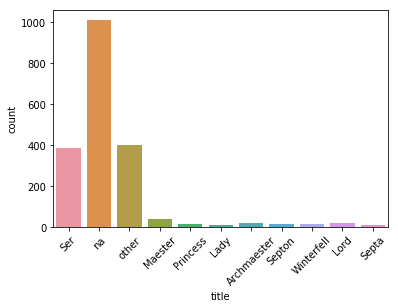

In [103]:
sns.countplot(x='title', data=GOT)
plt.xticks(rotation=45)

In [104]:
dummies = pd.get_dummies(list(GOT['title']), drop_first=True)
dummies = dummies.add_prefix('c_')
GOT=pd.concat ([GOT.loc[:,:],dummies],axis=1)

In [105]:
GOT['culture'].value_counts()

Northmen                   124
Ironborn                   112
Free Folk                   51
Valyrian                    43
Braavosi                    42
Ghiscari                    25
Dornish                     25
Dothraki                    23
Valemen                     19
Rivermen                    19
Reach                       16
Vale mountain clans         15
Dornishmen                  14
Westeros                    12
Free folk                   11
Westerman                    9
northmen                     9
Tyroshi                      7
Stormlands                   7
Qartheen                     6
Summer Isles                 5
Ironmen                      5
Northern mountain clans      5
Crannogmen                   4
Astapori                     4
Lysene                       4
Westermen                    4
First Men                    3
Pentoshi                     3
Myrish                       3
                          ... 
Wildling                     2
Wildling

In [106]:
GOT['culture']= GOT['culture'].fillna('na')
GOT['culture'].value_counts()

na                         1269
Northmen                    124
Ironborn                    112
Free Folk                    51
Valyrian                     43
Braavosi                     42
Ghiscari                     25
Dornish                      25
Dothraki                     23
Valemen                      19
Rivermen                     19
Reach                        16
Vale mountain clans          15
Dornishmen                   14
Westeros                     12
Free folk                    11
Westerman                     9
northmen                      9
Tyroshi                       7
Stormlands                    7
Qartheen                      6
Ironmen                       5
Northern mountain clans       5
Summer Isles                  5
Astapori                      4
Lysene                        4
Westermen                     4
Crannogmen                    4
Meereenese                    3
Lyseni                        3
                           ... 
westerme

In [107]:
GOT['culture']=GOT['culture'].replace({'northmen':'Northmen',
                                       'Free folk':'Free_Folk',
                                       'Free Folk':'Free_Folk',
                                       'Vale mountain clans': 'Vale_mountain'}) 

In [108]:
dd = ['na', 'Northmen', 'Ironborn',  'Valyrian',
                                                            'Braavosi', 'Ghiscari', 'Dornish', 'Dothraki', 'Valemen',
                                                           'Rivermen', 'Reach', 'Dornishmen', 'Westeros', 
                                                           'Westerman', 'Free_Folk', 'Vale_mountain']
GOT['culture'] = GOT['culture'].apply(lambda x : x if x in dd else 'other')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

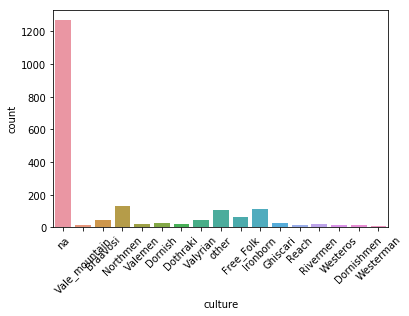

In [109]:
sns.countplot(x='culture', data=GOT)
plt.xticks(rotation=45)

In [110]:
dummies = pd.get_dummies(list(GOT['culture']), drop_first=True)
dummies = dummies.add_prefix('a_')
GOT=pd.concat ([GOT.loc[:,:],dummies],axis=1)

In [111]:
GOT['house']= GOT['house'].fillna('na')
GOT['house'].value_counts()

na                                427
Night's Watch                     105
House Frey                         97
House Stark                        72
House Targaryen                    62
House Lannister                    49
House Greyjoy                      41
House Tyrell                       36
House Martell                      29
House Osgrey                       21
Faith of the Seven                 17
House Hightower                    16
House Arryn                        16
House Bracken                      14
House Baratheon                    13
House Florent                      13
House Botley                       13
House Bolton                       13
Brave Companions                   12
House Tully                        12
House Whent                        11
Brotherhood without banners        11
House Velaryon                     11
House Crakehall                    10
House Seaworth                      9
House Clegane                       9
House Barath

In [112]:
GOT['house']=GOT['house'].replace({"Night's Watch":"the_Watch",
                                       'House Frey':'Frey',
                                       'House Stark':'Stark',
                                       'House Targaryen':'Targaryen',
                                       'House Lannister':'Lannister',
                                       'House Greyjoy':'Greyjoy',
                                       'House Tyrell':'Tyrell',
                                       'House Martell':'Martell',
                                       'House Osgrey':'Osgrey ',
                                       'Faith of the Seven':'Faith_of_the_Seven',
                                       'House Hightower':'Hightower',
                                       'House Arryn':'Arryn',
                                       'House Bracken':'Bracken',
                                       'House Florent':'Florent',
                                       'House Botley':'Botley',
                                       'House Baratheon':'Baratheon',
                                       'House Bolton':'Bolton',
                                       'Brave Companions':'Brave_Companions',
                                       'House Tully':'Tully',
                                       'House Whent':'Whent',
                                       'Brotherhood without banners':'Brotherhood',
                                       'House Velaryon':'Velaryon',
                                       'House Crakehall':'Crakehall'})


In [113]:
GOT['house'] = GOT['house'].apply(lambda x : x if x in ['na', "the_Watch", 'Frey', 'Stark', 'Targaryen',
                                                            'Lannister', 'Greyjoy', 'Tyrell', 'Martell',
                                                           'Osgrey', 'Faith_of_the_Seven','Hightower', 'Arryn', 
                                                            'Bracken', 'Florent', 'Botley', 'Baratheon',
                                                        'Bolton', 'Brave_Companions', 'Tully', 'Whent', 
                                                        'Brotherhood', 'Velaryon', 'Crakehall'] else 'other')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

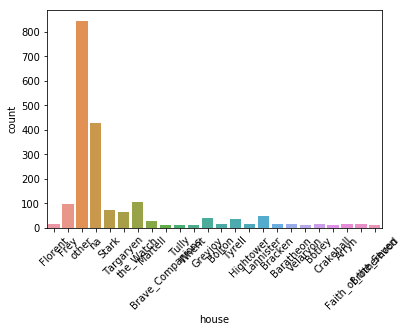

In [114]:
sns.countplot(x='house', data=GOT)
plt.xticks(rotation=45)

In [115]:
dummies = pd.get_dummies(list(GOT['house']), drop_first=True)
dummies = dummies.add_prefix('r_')
GOT=pd.concat ([GOT.loc[:,:],dummies],axis=1)

In [116]:
GOT=GOT.drop(['mother', 'father', 'heir', 'spouse'], axis=1)

In [117]:
GOT['DoD']= GOT.apply((lambda x: np.nan if (pd.isna(x['age']) or pd.isna(x['dateOfBirth'])) else x['dateOfBirth'] + x['age']), axis=1)

In [118]:
GOT['DoD'].value_counts()

305.0    270
299.0     36
300.0     26
130.0      8
298.0      6
283.0      5
209.0      5
196.0      4
120.0      3
297.0      3
129.0      3
271.0      3
282.0      3
105.0      2
289.0      2
133.0      2
276.0      2
278.0      2
261.0      2
252.0      2
216.0      2
264.0      2
132.0      1
248.0      1
161.0      1
256.0      1
178.0      1
220.0      1
296.0      1
272.0      1
        ... 
47.0       1
82.0       1
43.0       1
232.0      1
114.0      1
44.0       1
281.0      1
255.0      1
285.0      1
245.0      1
191.0      1
290.0      1
247.0      1
249.0      1
257.0      1
171.0      1
211.0      1
273.0      1
284.0      1
213.0      1
221.0      1
238.0      1
150.0      1
225.0      1
260.0      1
267.0      1
291.0      1
259.0      1
215.0      1
241.0      1
Name: DoD, Length: 62, dtype: int64

In [119]:
variable = GOT['DoD'].value_counts()[GOT['DoD'].value_counts() > 3]
GOT['reason'] = GOT['DoD'].apply(lambda x: 1 if x in variable.index else 0)

### Date of Birth

In [120]:
GOT['dateOfBirth'].describe()

count       433.000000
mean       1577.364896
std       19565.414460
min         -28.000000
25%         240.000000
50%         268.000000
75%         285.000000
max      298299.000000
Name: dateOfBirth, dtype: float64

In [121]:
GOT['dateOfBirth'] = GOT['dateOfBirth'].apply(lambda x: x if np.isnan(x) else (int(str(x)[:3]) if (len(str(x).split('.')[0]) > 3) else int(str(x).split('.')[0])))

In [122]:
GOT['dateOfBirth'].describe()

count    433.000000
mean     247.106236
std       59.341352
min      -28.000000
25%      240.000000
50%      268.000000
75%      285.000000
max      300.000000
Name: dateOfBirth, dtype: float64

### Number of books

In [123]:
GOT ['Books']= GOT['book1_A_Game_Of_Thrones']+GOT['book2_A_Clash_Of_Kings']+ GOT['book3_A_Storm_Of_Swords'] + GOT['book4_A_Feast_For_Crows'] + GOT['book5_A_Dance_with_Dragons']

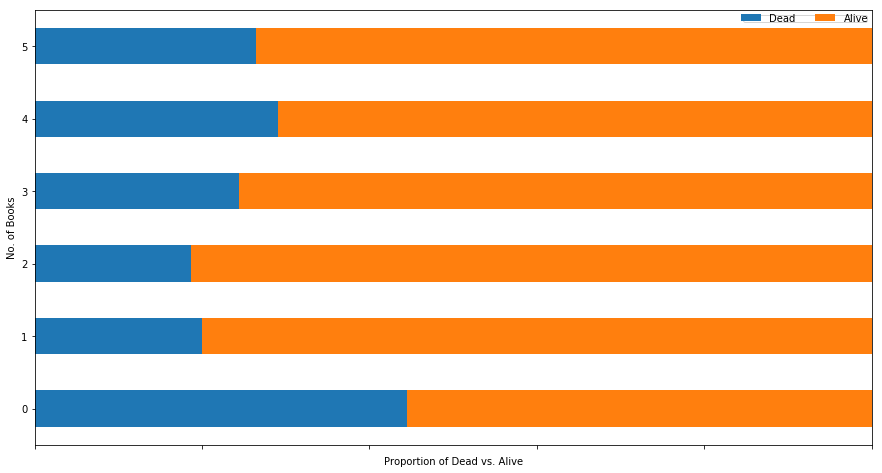

In [124]:
a = GOT.groupby(["Books", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
n = a.div(a.sum(axis = 1),
          axis = 0).plot.barh(stacked = True,
                              rot = 0,
                              figsize = (15, 8),
                              width = .5)
_ = n.set(xticklabels = "",
          xlim = [0, 1],
          ylabel = "No. of Books",
          xlabel = "Proportion of Dead vs. Alive"),
n.legend(["Dead", "Alive"],
         loc = "upper right",
         ncol = 2,
         borderpad = -.15)


In [125]:
GOT=GOT.drop(['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','isMarried',"isNoble"], axis=1)

### Age

In [126]:
GOT['age'] = GOT['age'].where(GOT['age'] > 0, GOT['DoD'] - GOT ['dateOfBirth'])

In [127]:
GOT['age'].describe()

count    433.000000
mean      36.695150
std       25.827229
min        0.000000
25%       18.000000
50%       27.000000
75%       50.000000
max      100.000000
Name: age, dtype: float64

### Current year

In [128]:
GOT['currYear'] = GOT ['DoD'] == 305

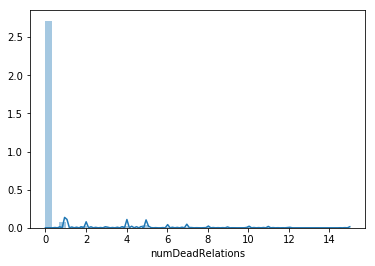

In [129]:
sns.distplot(GOT['numDeadRelations'])

### Has relations?

In [130]:
GOT['hasRelations'] = GOT['numDeadRelations'].apply(lambda x: 1 if x> 0 else 0)

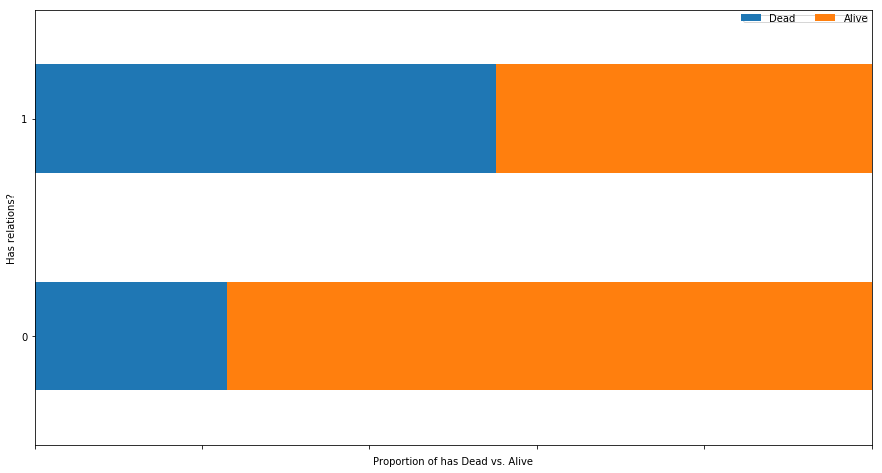

In [131]:
a = GOT.groupby(["hasRelations", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
n = a.div(a.sum(axis = 1),
          axis = 0).plot.barh(stacked = True,
                              rot = 0,
                              figsize = (15, 8),
                              width = .5)
_ = n.set(xticklabels = "",
          xlim = [0, 1],
          ylabel = "Has relations?",
          xlabel = "Proportion of has Dead vs. Alive"),
n.legend(["Dead", "Alive"],
         loc = "upper right",
         ncol = 2,
         borderpad = -.15)

### Popularity

No need to work on it

In [132]:
GOT.info()
GOT=GOT.drop(['name','title','culture','house', 'S.No'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 70 columns):
S.No                          1946 non-null int64
name                          1946 non-null object
title                         1946 non-null object
male                          1946 non-null int64
culture                       1946 non-null object
dateOfBirth                   433 non-null float64
house                         1946 non-null object
book1_A_Game_Of_Thrones       1946 non-null int64
book2_A_Clash_Of_Kings        1946 non-null int64
book3_A_Storm_Of_Swords       1946 non-null int64
book4_A_Feast_For_Crows       1946 non-null int64
book5_A_Dance_with_Dragons    1946 non-null int64
age                           433 non-null float64
numDeadRelations              1946 non-null int64
popularity                    1946 non-null float64
isAlive                       1946 non-null int64
c_Lady                        1946 non-null uint8
c_Lord                        1946 

In [133]:
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 65 columns):
male                          1946 non-null int64
dateOfBirth                   433 non-null float64
book1_A_Game_Of_Thrones       1946 non-null int64
book2_A_Clash_Of_Kings        1946 non-null int64
book3_A_Storm_Of_Swords       1946 non-null int64
book4_A_Feast_For_Crows       1946 non-null int64
book5_A_Dance_with_Dragons    1946 non-null int64
age                           433 non-null float64
numDeadRelations              1946 non-null int64
popularity                    1946 non-null float64
isAlive                       1946 non-null int64
c_Lady                        1946 non-null uint8
c_Lord                        1946 non-null uint8
c_Maester                     1946 non-null uint8
c_Princess                    1946 non-null uint8
c_Septa                       1946 non-null uint8
c_Septon                      1946 non-null uint8
c_Ser                         1946 non-

## Create training and test data

In [134]:
x = GOT.drop(['isAlive'], axis=1)
y = GOT['isAlive']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.1,
                                                    random_state = 508)

## XGBOOST

In [136]:
model = xgb.XGBClassifier(objective = 'binary:logistic',
                          max_depth = 3,
                          n_estimators = 177,
                          learning_rate = 0.29,
                          colsample_bytree = 0.9,
                          eval_metric = 'auc').fit(X_train, y_train)

In [137]:
score = model.score(X_test,
                     y_test)
train_score = model.score(X_train,
                           y_train)
diff = train_score - score

print("Testing score: %f" % (score))
print("Training score: %f" % (train_score))
print("Diff: %f" % (diff))

Testing score: 0.882051
Training score: 0.912621
Diff: 0.030570


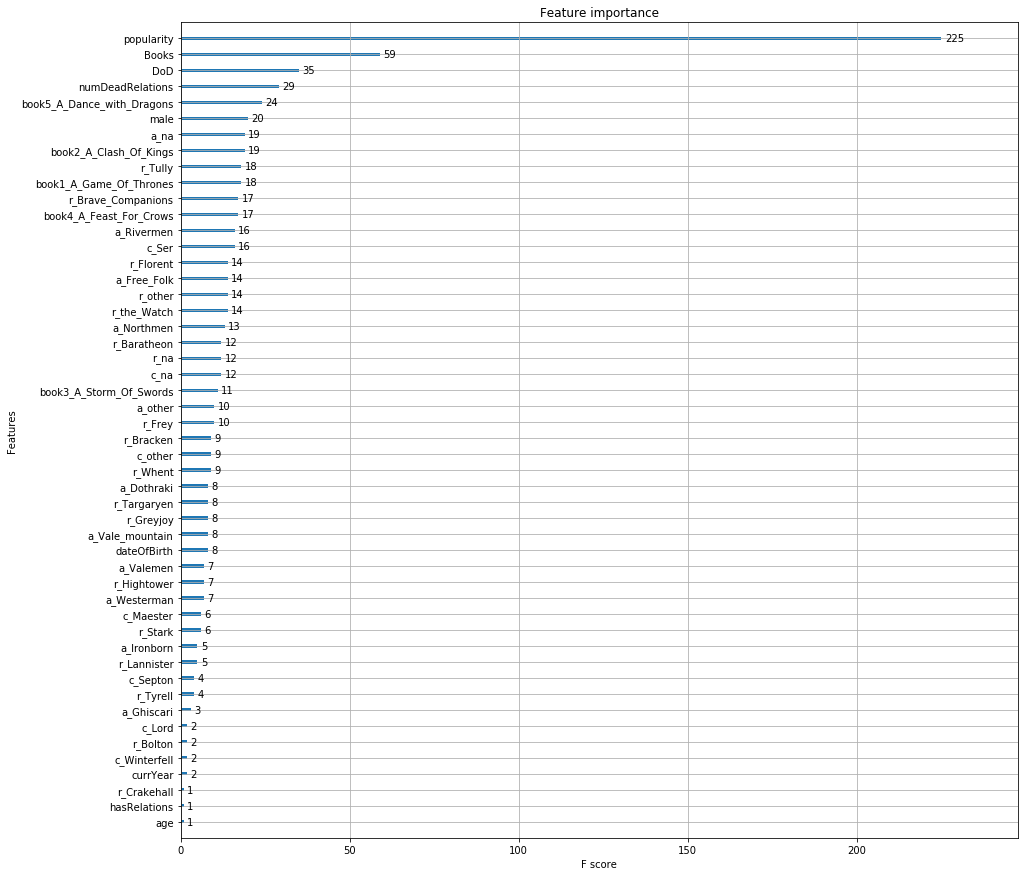

In [145]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [15,
                                  15]
plt.show()

# Output

In [ ]:
predicted = pd.DataFrame(xg_reg2.predict(X_test_n))
predicted.to_excel('output.xlsx')

In [ ]:
shap_values = shap.TreeExplainer(xg_reg2).shap_values(X_test_n)

In [ ]:
shap.summary_plot(shap_values,
                  X_test_n)

As can be seen above the dataset is quite sparse, but the overall feature influence on the prediction makes sense.

In [ ]:
shap.dependence_plot("drink",
                     shap_values,
                     X_test_n)

In [ ]:
shap.dependence_plot("cigs",
                     shap_values,
                     X_test_n)

In [ ]:
shap.dependence_plot("mage",
                     shap_values,
                     X_test_n)

In [ ]:
shap.dependence_plot("feduc",
                     shap_values,
                     X_test_n)

In [ ]:
shap.dependence_plot("fage",
                     shap_values,
                     X_test_n)

In [ ]:
shap_interaction_values = shap.TreeExplainer(xg_reg2).shap_interaction_values(X_test_n)

In [ ]:
shap.summary_plot(shap_interaction_values,
                  X_test_n)

In [ ]:
shap.dependence_plot(
    ("drink", "cigs"),
    shap_interaction_values,
    X_test_n,
    display_features = X_test_n
)

In [ ]:
shap.dependence_plot(
    ("drink", "fage"),
    shap_interaction_values,
    X_test_n,
    display_features = X_test_n
)

In [ ]:
tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:50]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(12,12))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]),
          X_test_n.columns[inds],
          rotation = 50.4,
          horizontalalignment = "right")
pl.xticks(range(tmp2.shape[0]),
          X_test_n.columns[inds],
          rotation = 50.4,
          horizontalalignment = "left")
pl.gca().xaxis.tick_top()
pl.show()